In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
86         1
92.7       1
77         1
73.2       1
69.3       1
Name: poverty_rate, Length: 771, dtype: int64

In [5]:
pr.shape

(29329, 3)

** replace the "-" with zero.**

In [6]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [7]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


** Convert type of poverty_rate colum to a numeric type (float).**

In [8]:
pr["poverty_rate"] = pr["poverty_rate"].astype("float64") 
# We convert type of poverty_rate colum to a numeric type (float).

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [9]:
poverty = pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False)
# we grouped state by poverty rate

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

Text(0, 0.5, 'Poverty Rate')

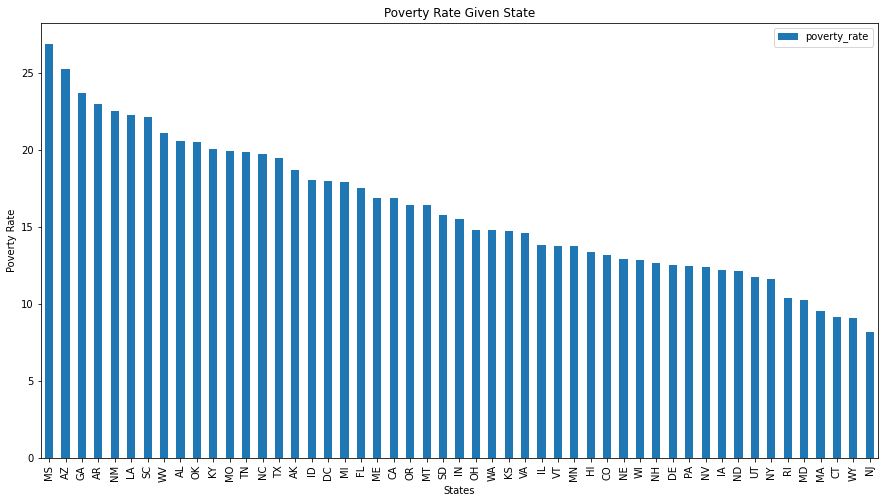

In [10]:
poverty.plot(kind="bar",figsize=(15,8),legend="poverty_rate",title="Poverty Rate Given State")
plt.xlabel("States")
plt.ylabel("Poverty Rate")

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [11]:
poverty = pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False)

In [12]:
poverty.index

Index(['MS', 'AZ', 'GA', 'AR', 'NM', 'LA', 'SC', 'WV', 'AL', 'OK', 'KY', 'MO',
       'TN', 'NC', 'TX', 'AK', 'ID', 'DC', 'MI', 'FL', 'ME', 'CA', 'OR', 'MT',
       'SD', 'IN', 'OH', 'WA', 'KS', 'VA', 'IL', 'VT', 'MN', 'HI', 'CO', 'NE',
       'WI', 'NH', 'DE', 'PA', 'NV', 'IA', 'ND', 'UT', 'NY', 'RI', 'MD', 'MA',
       'CT', 'WY', 'NJ'],
      dtype='object', name='Geographic Area')

In [13]:
poverty.values

array([26.88425414, 25.26807095, 23.66363636, 22.96321627, 22.50767494,
       22.29177215, 22.10555556, 21.08222222, 20.61179487, 20.54589502,
       20.08      , 19.93068732, 19.8872093 , 19.72056834, 19.4962221 ,
       18.67859155, 18.07621145, 18.        , 17.90072254, 17.50860566,
       16.89384615, 16.88837057, 16.43580902, 16.42328767, 15.74526854,
       15.49985294, 14.82666667, 14.82599681, 14.71904762, 14.58583474,
       13.84934211, 13.78595041, 13.74573643, 13.40066225, 13.18777293,
       12.91741379, 12.85868726, 12.65979381, 12.55584416, 12.48717367,
       12.37099237, 12.23154762, 12.1319202 , 11.72461538, 11.63896321,
       10.36944444, 10.27239382,  9.54634146,  9.1375    ,  9.06372549,
        8.16091743])

<BarContainer object of 51 artists>

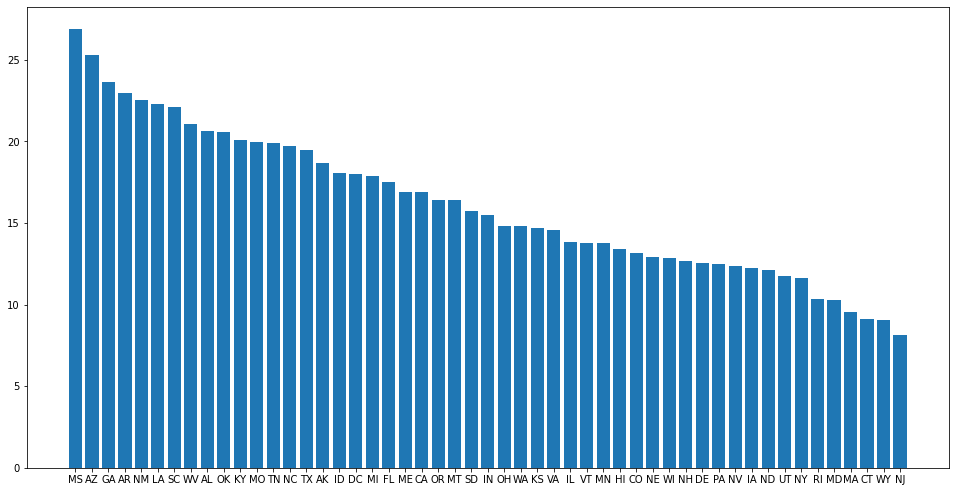

In [14]:
fig = plt.figure(figsize=(16,8))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(poverty.index,poverty.values)

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

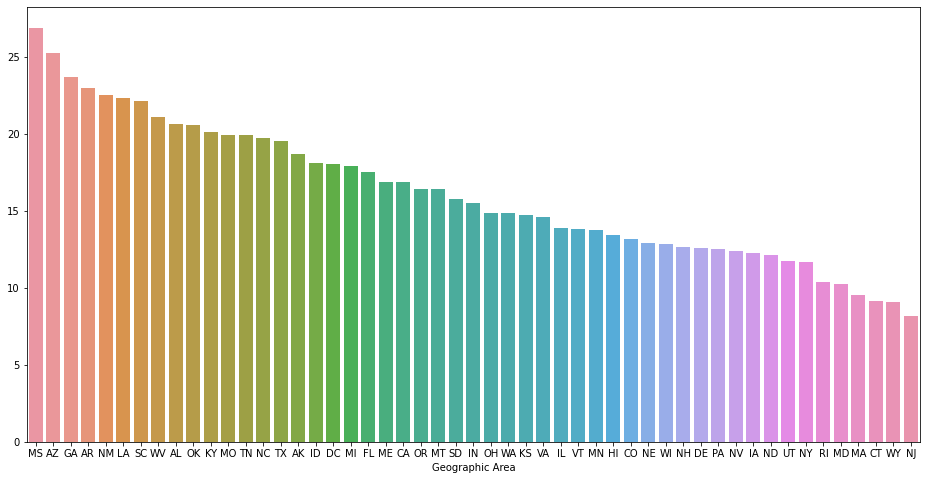

In [15]:
plt.figure(figsize=(16,8))
ax = sns.barplot(poverty.index,poverty.values)

## 2. Most common 15 Name or Surname of killed people 

In [16]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [17]:
kill.name.value_counts()

TK TK                       49
Brandon Jones                2
Daquan Antonio Westbrook     2
Eric Harris                  2
Michael Johnson              2
                            ..
Jorge Zambrano               1
Pablo Meza                   1
Mario Jordan                 1
Victor Emanuel Larosa        1
Paul Castaway                1
Name: name, Length: 2481, dtype: int64

In [18]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [19]:
kill = kill[kill.name != "TK TK"]

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [20]:
kill["name"] = [i[0] for i in pairs]

In [21]:
kill["surname"] = ["".join(i[1:]) for i in pairs]

In [22]:
kill.drop("surname",inplace = True,axis=1)

In [23]:
kill.insert(2,"surname",[" ".join(i[1:]) for i in pairs])


In [179]:
Counter(kill["name"]).most_common(7)

[('Michael', 69),
 ('David', 43),
 ('James', 41),
 ('Robert', 37),
 ('William', 37),
 ('John', 34),
 ('Christopher', 32)]

In [25]:
kill[kill["surname"].str.contains("Anthony") ].head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
165,270,Andrew,Anthony Williams,06/03/15,shot,vehicle,48.0,M,B,Putnam Hall,FL,False,other,Not fleeing,False
372,484,James,Anthony Cooper,21/05/15,shot,knife,43.0,M,W,North Charleston,SC,False,attack,Not fleeing,False
398,503,James,Anthony Morris,31/05/15,shot,gun,40.0,M,NaN,Medford,OR,True,attack,Not fleeing,False
903,1047,John,Anthony Gonzalez,01/12/15,shot,gun,18.0,M,H,Norwalk,CA,False,attack,Not fleeing,False
998,1145,Joel,Anthony Nelson,05/01/16,shot,vehicle,29.0,M,W,Olympia,WA,False,attack,Foot,False


In [26]:
aa = Counter(kill["name"]).most_common(8)

In [27]:
bb = Counter(kill["surname"]).most_common(7)

In [28]:
cc = aa+bb # most common name and surname


In [29]:
names, values = zip(*cc)
names

('Michael',
 'James',
 'David',
 'William',
 'Robert',
 'John',
 'Daniel',
 'Christopher',
 'Smith',
 'Johnson',
 'Hernandez',
 'Brown',
 'Jones',
 'Williams',
 'Garcia')

In [30]:
index = np.arange(len(cc))

Text(0.5, 0, 'Name or Surname of killed People')

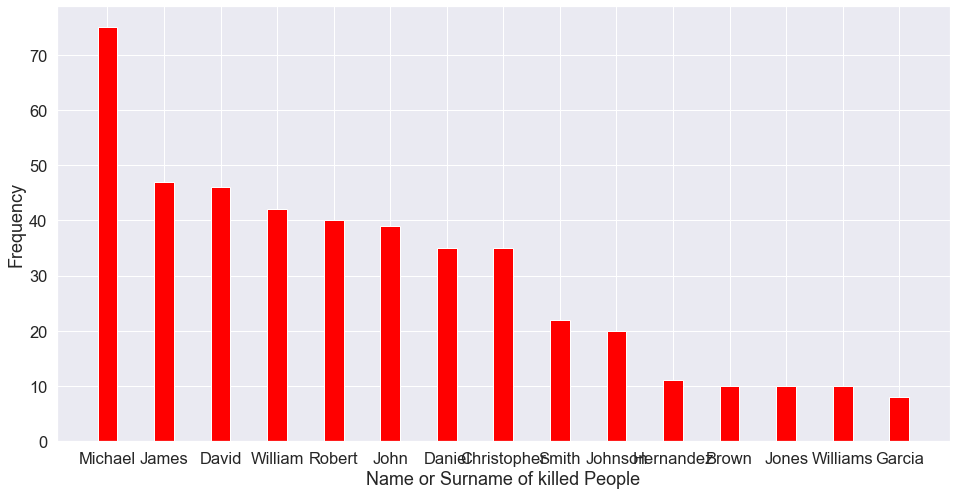

In [181]:
width = 0.35
fig, ax = plt.subplots(figsize = (16,8))
rects1 = ax.bar(names, values, width, color='r')
ax.set_ylabel("Frequency")
ax.set_xlabel("Name or Surname of killed People")
#ax.set_xticklabels(names)

## 3. Killed People According to Races (Pie Chart)

In [182]:
kill.head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [183]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [184]:
kill.race.value_counts()

W    1201
B     617
H     419
A      39
N      31
O      28
Name: race, dtype: int64

In [185]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2335 non-null   int64  
 1   name                     2335 non-null   object 
 2   surname                  2335 non-null   object 
 3   date                     2335 non-null   object 
 4   manner_of_death          2335 non-null   object 
 5   armed                    2329 non-null   object 
 6   age                      2310 non-null   float64
 7   gender                   2335 non-null   object 
 8   race                     2335 non-null   object 
 9   city                     2335 non-null   object 
 10  state                    2335 non-null   object 
 11  signs_of_mental_illness  2335 non-null   bool   
 12  threat_level             2335 non-null   object 
 13  flee                     2283 non-null   object 
 14  body_camera             

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [186]:
kill.dropna(subset=["race"],inplace=True)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [187]:
kill_by_race = kill["race"].value_counts(normalize=True)

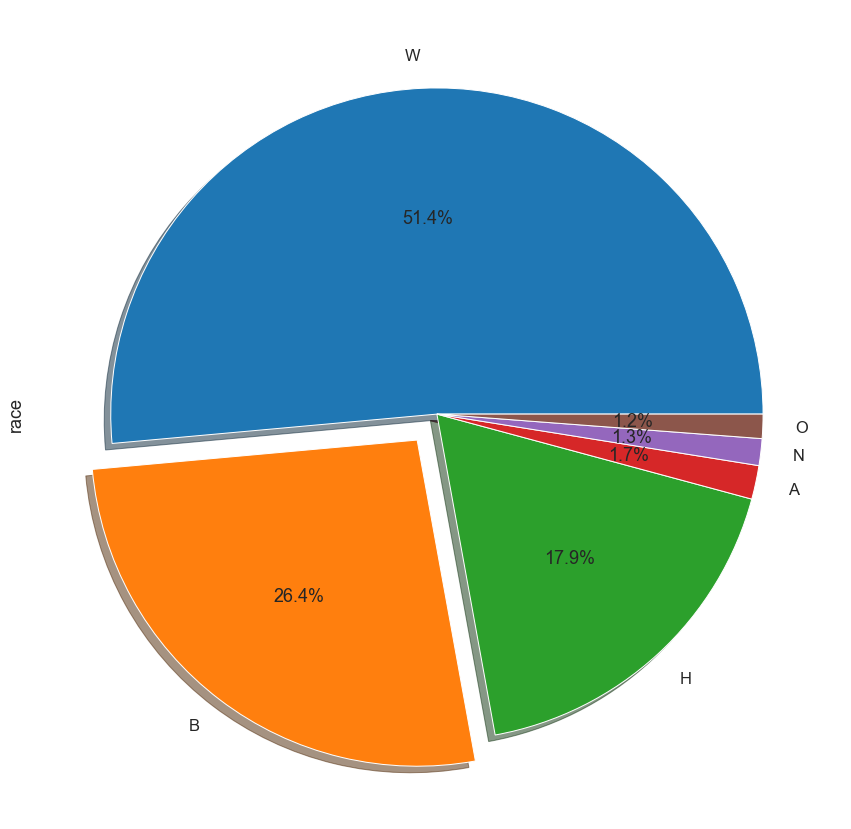

In [193]:
kill_by_race.plot(kind="pie",figsize=(20,15),autopct='%1.1f%%',shadow=True ,explode = (0,0.1,0,0,0,0))

## 4a.Box plot of age in both genders separeted by manner of death.

In [39]:
kill.head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [40]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

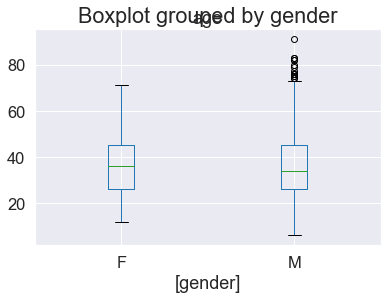

In [194]:
kill[["gender","age"]].boxplot(by="gender");

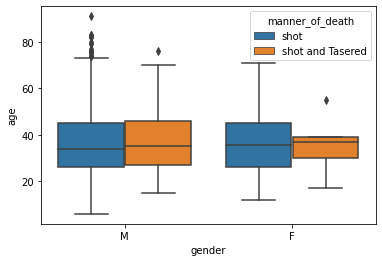

In [42]:
sns.boxplot(kill["gender"],kill["age"],hue = kill["manner_of_death"] )

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

In [43]:
kill.head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


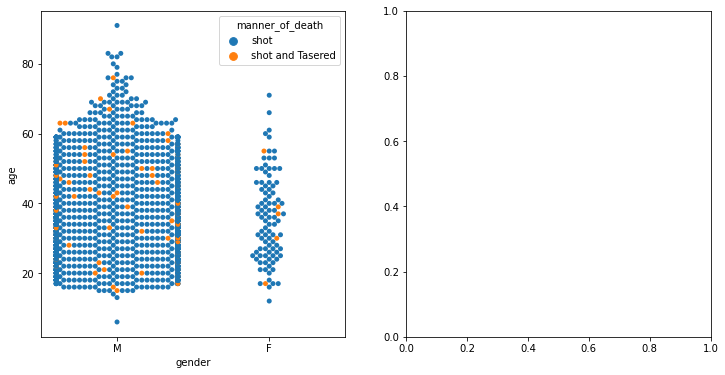

In [44]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill,ax=ax[0])

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

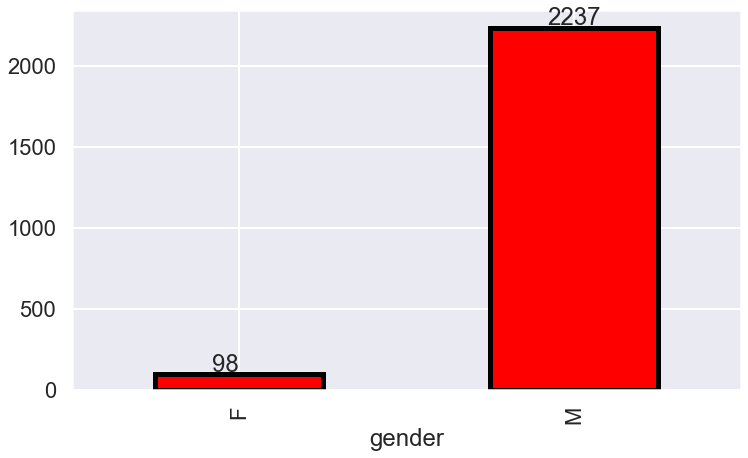

In [118]:
fig,ax= plt.subplots(figsize=(12,7))
sns.set_style("darkgrid")
sns.set_context("poster",font_scale=1)
kill.groupby("gender")["gender"].count().plot(kind="bar",edgecolor="black",color="red",linewidth=5)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.17, p.get_height()+15.8));

**INSTRUCTION-2: Plot 7 most common kill weapons**

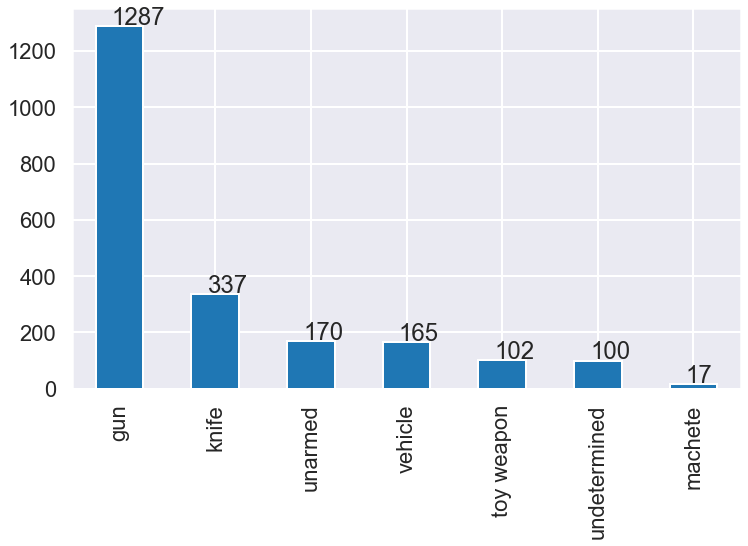

In [119]:
sns.set_style("darkgrid")
fig,ax= plt.subplots(figsize=(12,7))
aa = kill["armed"].value_counts().sort_values(ascending=False)
aa.iloc[0:7].plot(kind="bar",)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.17, p.get_height()+5.8));

In [82]:
comm_kill = sorted(zip(aa.index,aa.values), key= lambda x: x[1],reverse=True)[0:7]

In [83]:
x,y = zip(*comm_kill)
x

('gun', 'knife', 'unarmed', 'vehicle', 'toy weapon', 'undetermined', 'machete')

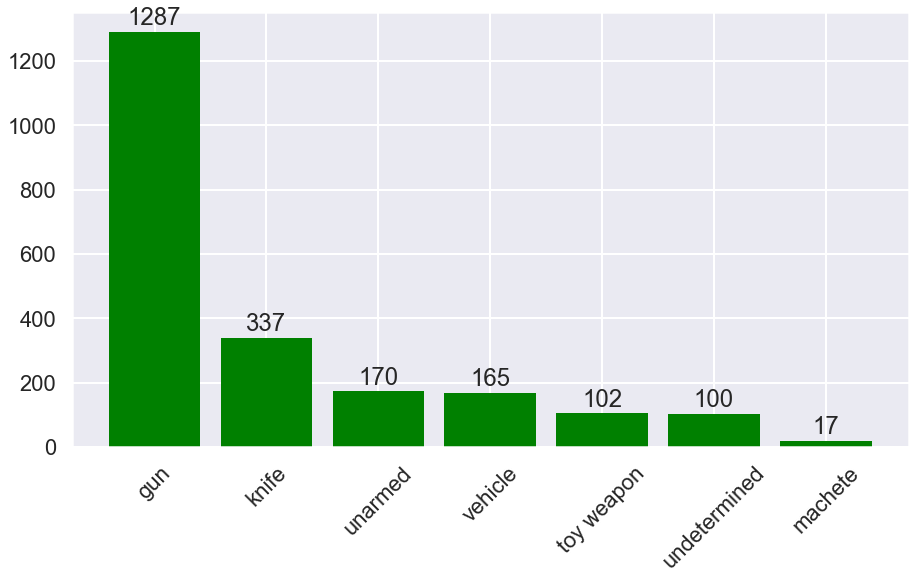

In [120]:
fig,ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x,y,edgecolor="green",color="g")
plt.xticks(rotation=45)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)        

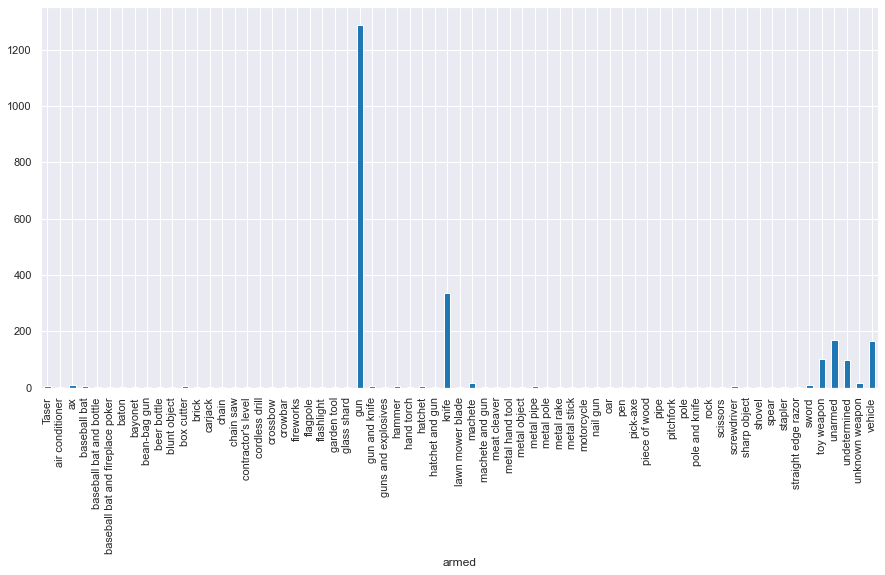

In [128]:
sns.set_context("notebook",font_scale=1)
kill.groupby("armed")["armed"].count().plot(kind="bar",figsize=(15,7))

In [51]:
#sns.barplot(kill.loc[kill["armed"].value_counts(),"armed"][0:7],data=kill)

In [85]:
bb = kill.loc[kill["armed"].value_counts(),"armed"][0:7]


In [86]:
bb.index
bb.values

array(['unarmed', 'knife', 'knife', 'vehicle', 'gun', 'unarmed',
       'unarmed'], dtype=object)

<BarContainer object of 7 artists>

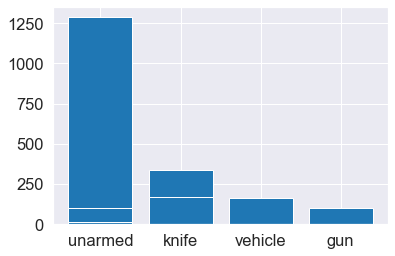

In [130]:
sns.set_context("notebook",font_scale=1.5)
plt.bar(bb.values,bb.index)

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [124]:
above25 = kill[kill["age"]>25]["age"].count()
under25 = kill[kill["age"]<25]["age"].count()


In [125]:
gg = pd.Series([above25,under25],index=["above 25","under 25"])

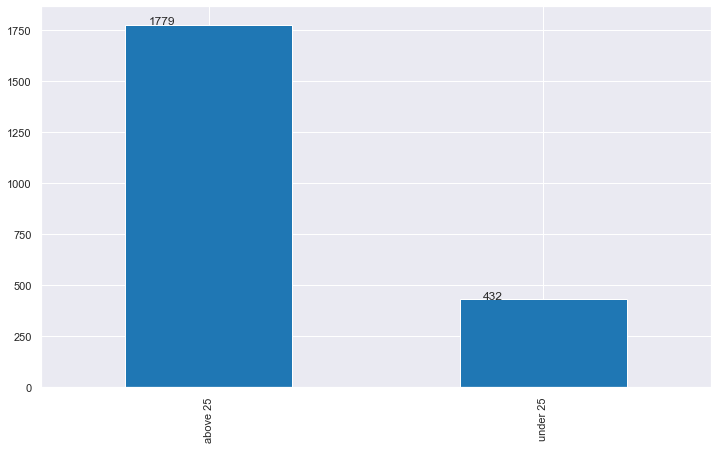

In [126]:
fig,ax= plt.subplots(figsize=(12,7))
gg.plot.bar()
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+0.8));

Text(0.5, 1.0, 'number of age of killed people')

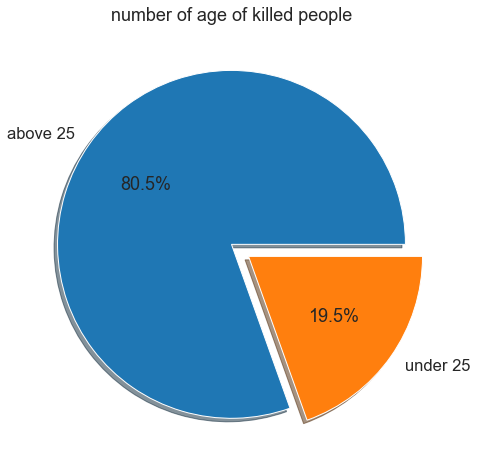

In [131]:
fig,ax = plt.subplots(figsize=(16,8))
explode = (0,0.2)
ax.pie(gg.values,labels=gg.index,shadow=True,explode = (0,0.12),autopct='%1.1f%%')
ax.set_title("number of age of killed people")

In [132]:
gg.index

Index(['above 25', 'under 25'], dtype='object')

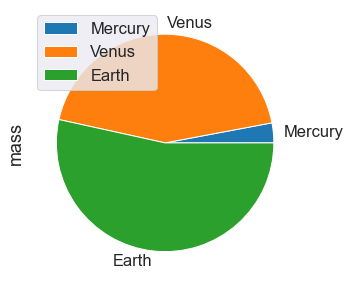

In [138]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(15, 5))
plt.legend(loc=2)
plot

In [61]:
kill.head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


**INSTRUCTION-4: Plot number of killed poeple by race**

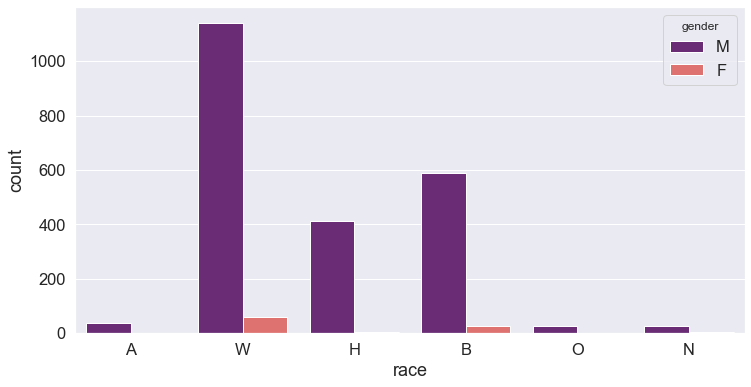

In [143]:
plt.figure(figsize=(12,6))
sns.countplot("race",data=kill,hue="gender",palette="magma" )


**INSTRUCTION-5: Plot 12 most dangerous cities**

In [63]:
kill

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn,K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra,Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2528,2812,Alejandro,Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2533,2817,Isaiah,Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [64]:
most_12 = kill["state"].value_counts()[0:12]
most_12

CA    379
TX    210
FL    142
AZ    107
OH     74
OK     69
NC     68
CO     64
GA     63
IL     59
MO     59
TN     56
Name: state, dtype: int64

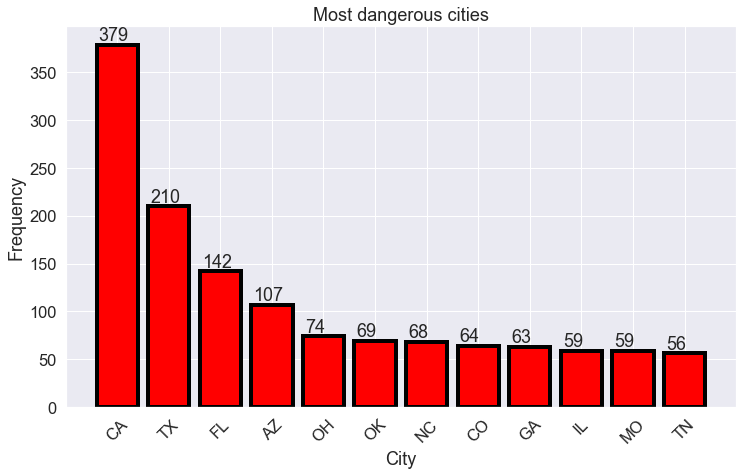

In [151]:
fig,ax = plt.subplots(figsize=(12,7))
ax.bar(most_12.index,most_12.values,color="r",edgecolor="black",lw=4)
plt.xticks(rotation = 45)
plt.title("Most dangerous cities")
plt.ylabel("Frequency")
plt.xlabel("City")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+4.5));

**INSTRUCTION-6: Plot 20 most dangerous states**

In [66]:
city = kill["city"].value_counts()[0:12]
city

Los Angeles     35
Phoenix         28
Houston         26
Chicago         24
San Antonio     18
Austin          18
Columbus        18
Las Vegas       17
Miami           17
Tucson          14
Indianapolis    14
St. Louis       14
Name: city, dtype: int64

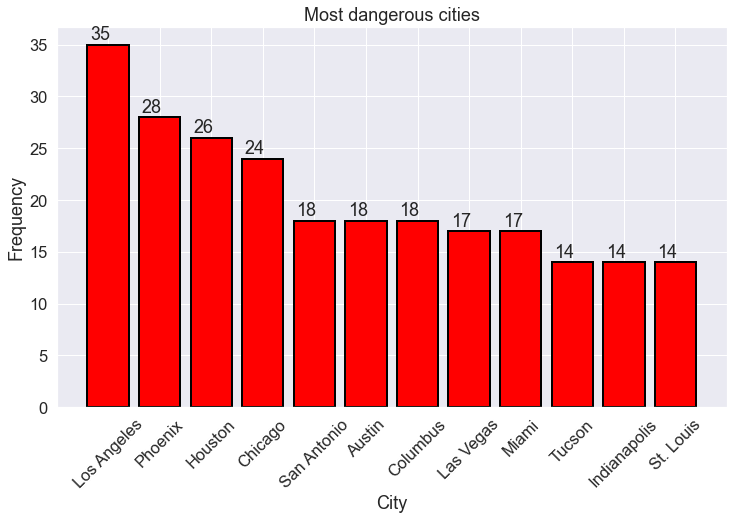

In [152]:
fig,ax = plt.subplots(figsize=(12,7))
ax.bar(city.index,city.values,color="r",edgecolor="black",lw=2)
plt.xticks(rotation = 45)
plt.title("Most dangerous cities")
plt.ylabel("Frequency")
plt.xlabel("City")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+0.5));

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

In [68]:
mental = kill.signs_of_mental_illness.value_counts()
mental.index = ["Mental ilness","No Mental İlness"]

([<matplotlib.axis.XTick at 0x25508dc4970>,
 [Text(0, 0, 'Mental ilness'), Text(0, 0, 'No mental ilness')])

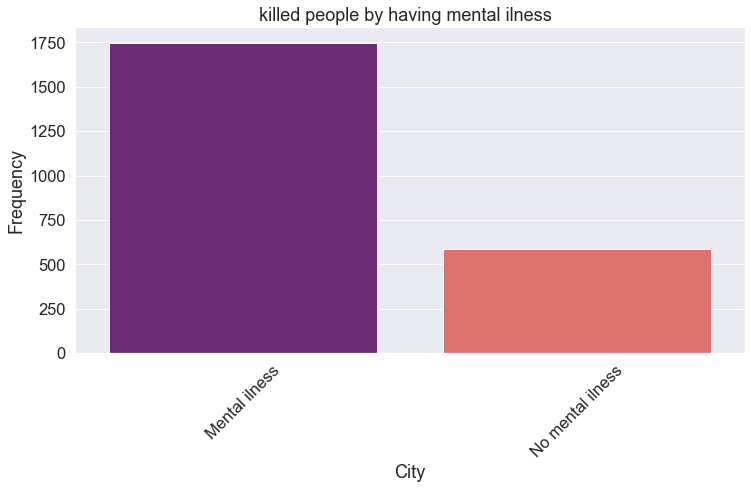

In [173]:
plt.figure(figsize=(12,6))
sns.countplot(x="signs_of_mental_illness" ,data=kill,palette="magma");
plt.title("killed people by having mental ilness  ");
plt.ylabel("Frequency")
plt.xlabel("City")
plt.xticks( np.arange(2), ['Mental ilness', 'No mental ilness'],rotation=45)

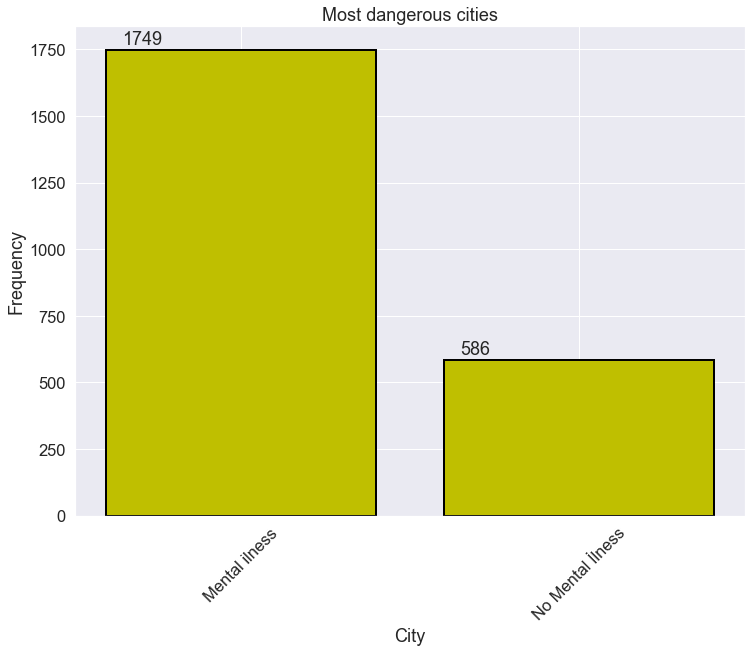

In [153]:
fig,ax = plt.subplots(figsize=(12,9))
ax.bar(mental.index,mental.values,color="y",edgecolor="black",lw=2)
plt.xticks(rotation = 45)
plt.title("Most dangerous cities")
plt.ylabel("Frequency")
plt.xlabel("City")
#ax.set_xticks(["Mental İlness","No Mental İlness"])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+20));

**INSTRUCTION-8: Plot number of Threat Types**

In [70]:
kill.head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


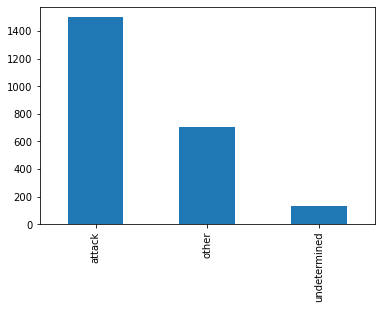

In [71]:
kill.threat_level.value_counts().plot.bar()

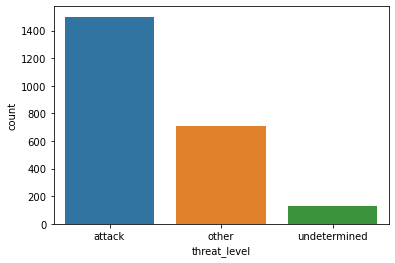

In [72]:
sns.countplot("threat_level",data=kill)

**INSTRUCTION-9: Plot number of Flee Types**

In [195]:
kill.head()

,id,name,surname,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [196]:
kill.flee.value_counts()

Not fleeing    1551
Car             365
Foot            278
Other            89
Name: flee, dtype: int64

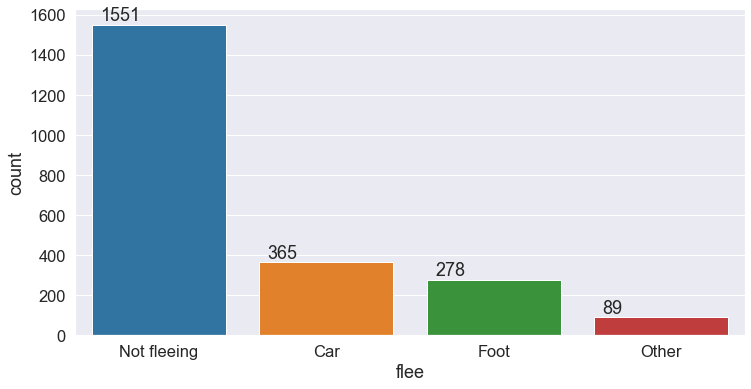

In [199]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(kill.flee)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+20));